In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

In [2]:
ds = 1

info = pd.read_csv('data/info_{0}.csv'. format(ds), index_col=0)
train_data = pd.read_csv('data/train_{0}.csv'.format(ds), header=None)
test_data = pd.read_csv('data/test_with_label_{0}.csv'.format(ds), header=None)

model_name = 'Base-MLP'
output_csv = "output/{0}-DS{1}.csv".format(model_name, ds)

In [3]:
# Data definitions
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [4]:
clf = MLPClassifier(hidden_layer_sizes = (100,),
                    activation = 'logistic',
                    solver = 'sgd',
                    random_state=42)
clf.fit(X_train, y_train)

/home/yuxiang/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', random_state=42, solver='sgd')

In [5]:
y_pred = pd.Series(clf.predict(X_test))

In [6]:
y_pred.to_csv(output_csv, header=None)
y_pred

0     11
1     13
2      0
3      2
4      8
      ..
75     9
76    10
77    17
78     6
79     8
Length: 80, dtype: int64

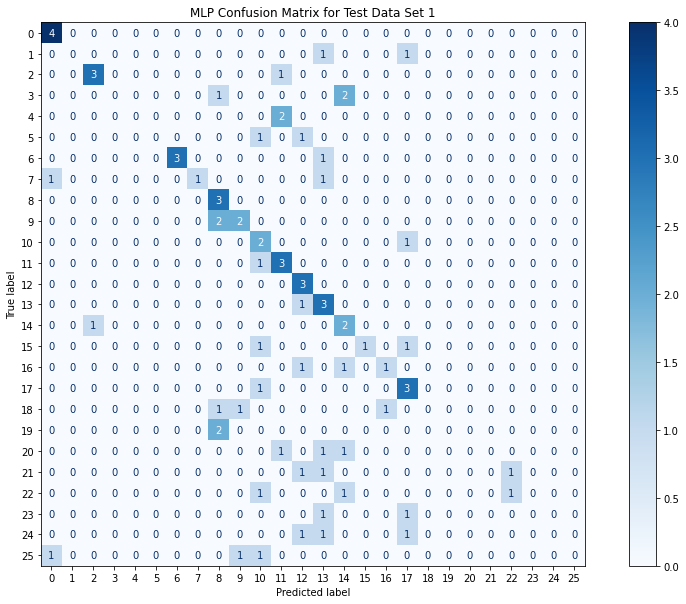

In [7]:
outmatrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(16,10))
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', ax=ax)
ax.set_title('MLP Confusion Matrix for Test Data Set {0}'.format(ds))
plt.savefig('img/{0}_confusion_matrix_DS{1}'.format(model_name, ds))
plt.show()

In [8]:
def compute_metrics(df, y_true, y_pred):
    df_metrics = pd.DataFrame(classification_report(y_true, y_pred, target_names=df['symbol'], output_dict=True, zero_division=0)).T
    df_metrics['symbol'] = df_metrics.index
    df_metrics
    return pd.merge(df, df_metrics, how='right')

info = compute_metrics(info, y_test, y_pred)
info.to_csv(output_csv, mode='a')
info

,symbol,precision,recall,f1-score,support
0,A,0.666667,1.000000,0.800000,4.0000
1,B,0.000000,0.000000,0.000000,2.0000
2,C,0.750000,0.750000,0.750000,4.0000
3,D,0.000000,0.000000,0.000000,3.0000
4,E,0.000000,0.000000,0.000000,2.0000
5,F,0.000000,0.000000,0.000000,2.0000
6,G,1.000000,0.750000,0.857143,4.0000
7,H,1.000000,0.333333,0.500000,3.0000
8,I,0.333333,1.000000,0.500000,3.0000
9,J,0.500000,0.500000,0.500000,4.0000


In [9]:
def compute_scores(y_test, y_pred):
    return [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average='macro'),
        f1_score(y_test, y_pred, average='weighted')
    ]

model_desc = pd.DataFrame(index=['accuracy', 'macro-average-f1', 'weighted-average-f1'])

model_desc['DS{}'.format(ds)] = compute_scores(y_test, y_pred)
model_desc['DS{}'.format(ds)].to_frame().T.to_csv(output_csv, mode='a')
model_desc

,DS1
accuracy,0.437500
macro-average-f1,0.307318
weighted-average-f1,0.354399
